# Flexfringe in Google Colab and Jupyter Notebook

*flexfringe* is a finite state machine learning tool build. It's built around the idea of flexibly building problem-specific variants of a state-merging learning algorithm and implemented in C++.

It compiles on Windows, MacoOS and Linux natively. It can either be using via its command line interface, or with a couple of wrappers in Python (or any other language of choice).

This notebook illustrates how to use *flexfringe* from Jupyter notebooks.

## Step 1: Setting up

### a) Clone flexfringe 

Currently, the best choice is the *multivariate* branch, although we are going to merge everything into master for the next release.


In [ ]:
!apt install graphviz
!pip install graphviz

!rm -rf dfasat
!git clone https://bitbucket.org/chrshmmmr/dfasat.git

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
--2020-07-30 17:36:19--  http://stamina.chefbe.net/downloads/grid.tar.gz
Resolving stamina.chefbe.net (stamina.chefbe.net)... 35.205.191.57
Connecting to stamina.chefbe.net (stamina.chefbe.net)|35.205.191.57|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3536361 (3.4M) [application/octet-stream]
Saving to: ‘grid.tar.gz.1’

grid.tar.gz.1       100%[===================>]   3.37M   874KB/s    in 4.5s    

2020-07-30 17:36:23 (767 KB/s) - ‘grid.tar.gz.1’ saved [3536361/3536361]

Cloning into 'dfasat'...
remote: Counting objects: 4358, done.
remote: Compressing objects: 100% (2582/2582), done.
remote: Total 4358 (delta 2824),

### b) compile *flexfringe*


It compiles without dependencies, but requires the graphviz package to plot the automata models (which are printed as dot files).

---



In [ ]:
!cd dfasat && git checkout multivariate && make clean all

Branch 'multivariate' set up to track remote branch 'multivariate' from 'origin'.
Switched to a new branch 'multivariate'
rm -f flexfringe ./source/evaluation/*.o source/generated.cpp named_tuple.py *.dot *.json exposed_decl.pypp.txt flexfringe*.so source/gitversion.cpp source/evaluators.h
sh collector.sh
rm: cannot remove 'source/evaluators.h': No such file or directory
[ -e .git/HEAD ] && [ -e .git/index ] && echo "const char *gitversion = \"ba47c0a4c9b088f335e7f52be4afb3a847042f38\";" > source/gitversion.cpp || echo "const char *gitversion = \"No commit info available\";" > source/gitversion.cpp
g++ -fPIC -c -DLOGURU_WITH_STREAMS=1 -o source/evaluation/depth-driven.o source/evaluation/depth-driven.cpp -I.source -w -std=c++11 -L/opt/local/lib -I/opt/local/include -I./source -I./source/evaluation -lm -lpthread -ldl     
g++ -fPIC -c -DLOGURU_WITH_STREAMS=1 -o source/evaluation/evaluate.o source/evaluation/evaluate.cpp -I.source -w -std=c++11 -L/opt/local/lib -I/opt/local/include -I./s

## Step 2: A wrapper
To use *flexfringe*, we wrap it in a Python function call. We use the *kwargs* dictionary to map parameters to command line arguments and simply call the compiled binary via subprocess, patching the program output back to the notebook.

In [ ]:
import subprocess
import sys
import graphviz

from IPython.display import Image, display

def flexfringe(*args, **kwargs):
  """Wrapper to call the flexfringe binary

   Keyword arguments:
   position 0 -- input file with trace samples
   kwargs -- list of key=value arguments to pass as command line arguments
  """  
  command = ["--help"]

  if(len(kwargs) >= 1):
    command = []
    for key in kwargs:
      command += ["-" + key + "" + kwargs[key]]

  result = subprocess.run(["dfasat/flexfringe",] + command + [args[0]], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
  print(result.returncode, result.stdout.decode(), result.stderr.decode())

  
  try:
    with open("dfafinal.dot") as fh:
      return fh.read()
  except FileNotFoundError:
    pass
  
  return "No output file was generated."

def show(data):
  """Show a dot string as (inline-) PNG

    Keyword arguments:
    data -- string formated in graphviz dot language to visualize
  """
  if data=="":
    pass
  else:
    g = graphviz.Source(data, format="png")
    g.render()
    display(Image(g.render()))
 

## Step 3: Example

We will call the flexfringe function with the filename and shortform named arguments just as described in help. 
(Note: Some longform arguments contain a minus-sign (-), which makes them an expression. That is not allowed as a parameter to the flexfringe function call.)

The flexringe() call returns a string with the dot output.

Here, we run *flexfringe* on problem set 1 from the Stamina competition. Most parameters are stored in the batch-overlap.ini file:

```
[default]
heuristic-name = overlap_driven
data-name = overlap_data
; for use with small datasets use low counts
state_count = 5
symbol_count = 5
lowerbound = 3
satdfabound = 20000
largestblue = 0
sinkson = 1
sinkcount = 2
extend = 0
finalred = 1
```

Which simply contains command line parameters and values for *flexfringe*. We overwrite the state_count and symbol_count arguments by specifying alternative values using their shorthand arguments *-q* and *-y*.

The input file *1_training.txt.dat* contains a header line at the top with #sample_number #alphabet_size:#attributes, and then samples as label length symbol_1 ... symbol_n.

```
10244 2:0
1 9 1 0 0 0 0 0 0 0 0
1 15 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0
0 5 0 1 0 0 0
1 2 0 0

```

The call returns a string with the identified state machine as a dot-formatted string, and writes the solution as dot and json to disk.



In [ ]:
data = flexfringe("dfasat/data/staminadata/1_training.txt.dat", i="/content/dfasat/ini/batch-overlap.ini", q="25", y="25")

['-i/content/dfasat/ini/batch-overlap.ini', '-q25', '-y25']
0 valid: overlap_driven
Using heuristic overlap_driven
Creating apta using evaluation class overlap_data
batch mode selected
reading data finished, processing:
dfasat running                                                                                                                                                                                                                                                                                                                                                                                                                         

found intermediate solution with 102 and 1 red states
No valid solver specified, skipping...
 done parsing
starting greedy merging
xxxxxxxxm172m295m275xm186m578xxm507m1016xm209xm576xm1043m1718xm130xxxm276xm112xxxxm86m170xm141xxm49m33xm21m35xxxm34m28xxxm152xxxxxm36xm66xm149xm26xm25xm44m43xm32m14xm26m21xm25xxm45xm31xm10m25xm76m187xm54xm27xxm20m17xm146xxm3

## Step 4: Visualization

We render the result using the Python wrapper to graphvit dot using the *show()* function we defined earlier.

The start is indicated by a square note. Transitions are labeled with the symbol (0 or 1) and the occurance count of that symbol. The nodes currently contain various debug information, the occurance ount, and symbol distribution information.


In [ ]:
show(data)

## Alternative: Commandline

You can also directly call *flexfringe* from command line.

 Each cell can act as a shell by prepending a bang ! to the commands.

In [ ]:
!dfasat/flexfringe -h overlap_driven -d overlap_data dfasat/data/staminadata/1_training.txt.dat 

valid: overlap_driven
Using heuristic overlap_driven
Creating apta using evaluation class overlap_data
done parsing
batch mode selected
reading data finished, processing:
dfasat runningstarting greedy merging
 x  x  x  x  x  x  x  x  x  x  x  x  x  x  x  x  x  x  x  x  x  x  x  x  x  x  m552  x  x  x  x  x  x  x  x  x  x  m507  m1016  m1043  m1718  m359  x  m242  m278  m331  x  m367  x  x  m195  x  x  m272  m275  m186  x  m578  m181  x  m112  m145  m100  m103  m108  m149  m97  x  m183  m77  m77  m96  m58  x  m57  x  m51  x  m112  m92  m78  m59  m38  m29  m30  x  m32  m37  x  x  m44  m48  x  m58  m49  m39  m26  x  m25  x  m20  m20  m17  x  m15  x  m14  m14  x  m19  x  m12  m11  m9  m6  m6  m5  m2  no more possible merges


found intermediate solution with 59 and 1 red states
No valid solver specified, skipping...


In [ ]:
!dot -Tpng dfafinal.dot > outfile.png

## Step 6

Visualize the files using inline Python calls, e.g. display and Image

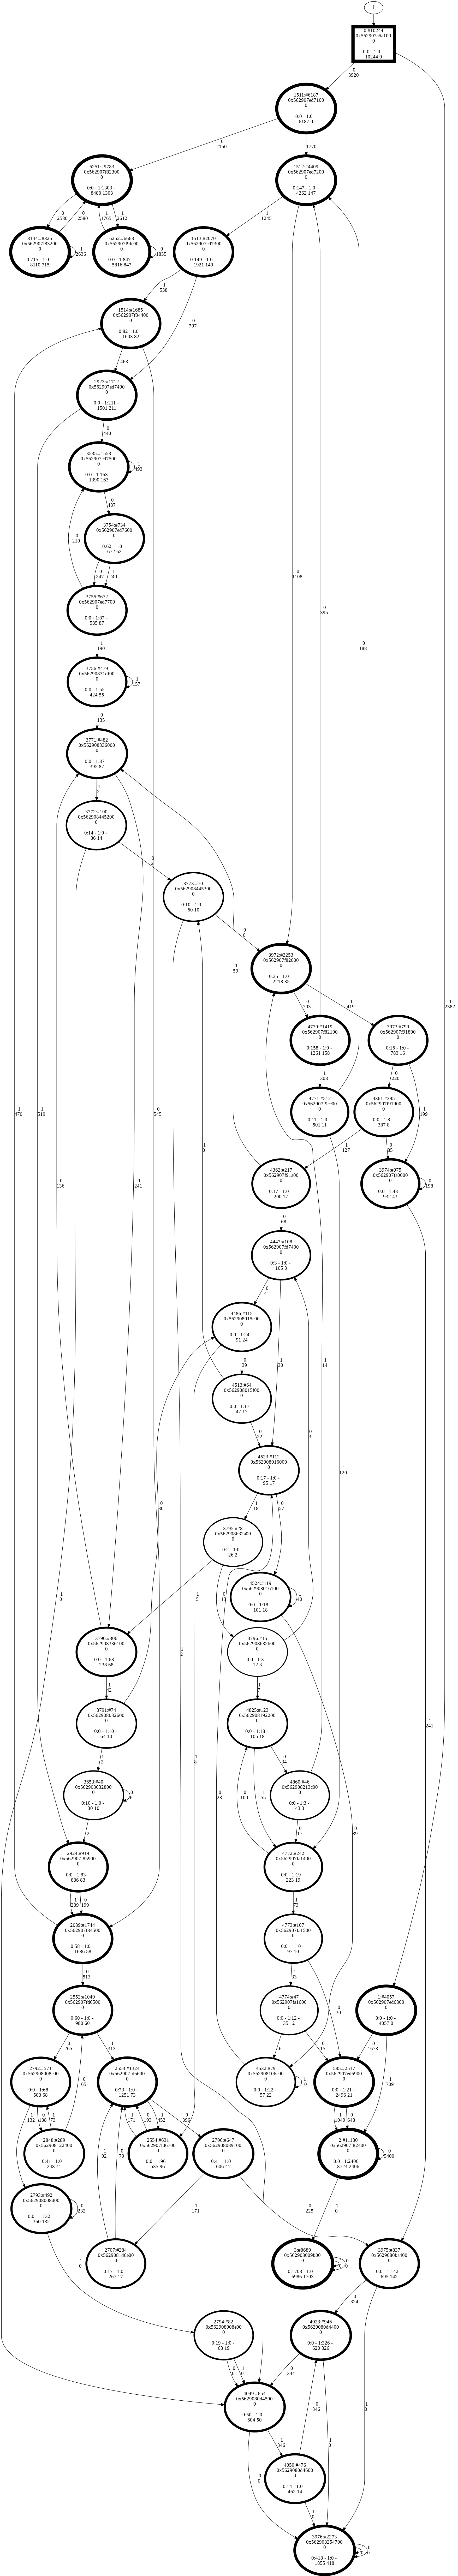

In [ ]:
display(Image("outfile.png"))